In [2]:
from operator import index

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.power import TTestIndPower
import re

In [3]:
station = pd.read_csv("./094/station.csv", sep='\t', engine="python")
patient = pd.read_csv("./094/patient.csv", sep='\t', engine="python")
observation = pd.read_csv("./094/observation.csv", sep='\t', engine="python")

## 2.1 A

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
y = observation['oximetry']
x = observation.drop(columns=['oximetry'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

train_df = X_train.copy()
train_df["oximetry"] = y_train

test_df = X_test.copy()
test_df["oximetry"] = y_test

train_df.to_csv("train_raw.csv", index=False)
test_df.to_csv("test_raw.csv", index=False)

## 2.1 B

In [6]:
train_df = pd.read_csv("train_raw.csv")

In [7]:
train_df.dtypes

SpO₂                     float64
HR                       float64
PI                       float64
RR                       float64
EtCO₂                    float64
FiO₂                     float64
PRV                      float64
BP                       float64
Skin Temperature         float64
Motion/Activity index    float64
PVI                      float64
Hb level                 float64
SV                       float64
CO                       float64
Blood Flow Index         float64
PPG waveform features    float64
Signal Quality Index     float64
Respiratory effort       float64
O₂ extraction ratio      float64
SNR                      float64
latitude                 float64
longitude                float64
oximetry                 float64
dtype: object

In [8]:
train_df.isnull().sum().sum()

np.int64(0)

In [9]:
train_df.duplicated().sum()

np.int64(0)

## 2.1 C

Scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler 

min_max_train_df = train_df.copy()

scaler = MinMaxScaler()

scaled = scaler.fit_transform(min_max_train_df) 

scaled

array([[0.45276178, 0.50565087, 0.25645509, ..., 0.603708  , 0.17673603,
        1.        ],
       [0.58886547, 0.55577968, 0.6179188 , ..., 0.79828603, 0.23083105,
        1.        ],
       [0.5288536 , 0.46830527, 0.31574099, ..., 1.        , 0.51727084,
        1.        ],
       ...,
       [0.41719763, 0.53771322, 0.31790977, ..., 0.66930273, 0.70221359,
        1.        ],
       [0.53492046, 0.5403468 , 0.34789105, ..., 0.68780225, 0.69049618,
        0.        ],
       [0.56248983, 0.36472526, 0.40685264, ..., 0.97613058, 0.54000764,
        0.        ]])

In [11]:
from sklearn.preprocessing import StandardScaler 

standard_train_df = train_df.copy()

scaler = StandardScaler()

scaled = scaler.fit_transform(standard_train_df) 

scaled

array([[-0.61285113,  0.16958797, -1.02446594, ..., -0.44608858,
        -1.4207134 ,  0.83446474],
       [ 0.46388163,  0.5730105 ,  0.86314176, ...,  0.60766575,
        -1.17568571,  0.83446474],
       [-0.01087947, -0.1309589 , -0.71486771, ...,  1.70006538,
         0.12176615,  0.83446474],
       ...,
       [-0.8942034 ,  0.42761672, -0.70354212, ..., -0.09085455,
         0.95947903,  0.83446474],
       [ 0.03711616,  0.448811  , -0.5469762 , ...,  0.00933123,
         0.90640411, -1.19837298],
       [ 0.25522079, -0.96454168, -0.23907157, ...,  1.57079847,
         0.22475429, -1.19837298]])

Transformers

(array([[1.000e+00, 4.000e+00, 4.000e+00, 3.300e+01, 5.500e+01, 1.050e+02,
         2.130e+02, 3.880e+02, 6.440e+02, 1.009e+03, 1.196e+03, 1.326e+03,
         1.313e+03, 1.125e+03, 8.750e+02, 6.130e+02, 3.690e+02, 2.310e+02,
         8.400e+01, 4.400e+01, 2.500e+01, 4.000e+00, 2.000e+00, 1.000e+00,
         0.000e+00],
        [1.000e+00, 2.000e+00, 7.000e+00, 1.700e+01, 4.700e+01, 1.220e+02,
         2.450e+02, 4.090e+02, 6.890e+02, 9.210e+02, 1.145e+03, 1.351e+03,
         1.274e+03, 1.142e+03, 9.300e+02, 6.090e+02, 3.770e+02, 2.110e+02,
         8.800e+01, 5.400e+01, 1.800e+01, 3.000e+00, 1.000e+00, 1.000e+00,
         0.000e+00],
        [0.000e+00, 0.000e+00, 2.000e+00, 8.000e+00, 3.600e+01, 8.600e+01,
         2.150e+02, 4.800e+02, 8.050e+02, 1.225e+03, 1.331e+03, 9.140e+02,
         6.790e+02, 1.001e+03, 1.165e+03, 9.880e+02, 5.670e+02, 1.380e+02,
         2.300e+01, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00],
        [1.000e+00, 1.000e+00, 8.000e

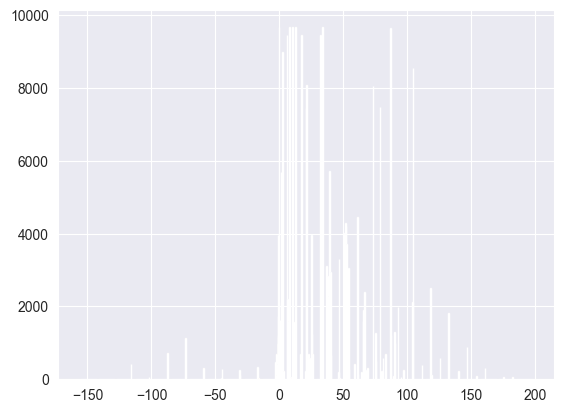

In [12]:
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot

power_train_df = train_df.copy()

pyplot.hist(power_train_df, bins=25)

power = PowerTransformer(method='yeo-johnson', standardize=True) 

data_trans = power.fit_transform(power_train_df)

pyplot.hist(data_trans, bins=25) 

(array([[ 638., 1231., 1033.,  958.,  987.,  968.,  961.,  985., 1234.,
          669.],
        [ 652., 1235., 1002.,  955., 1006.,  950.,  995.,  981., 1242.,
          646.],
        [ 787., 1130., 1003.,  973., 1023.,  813., 1039.,  981., 1169.,
          746.],
        [ 653., 1240.,  997.,  970.,  989.,  949.,  988.,  973., 1236.,
          669.],
        [ 750., 1146.,  985.,  986.,  983.,  960.,  980.,  957., 1264.,
          653.],
        [ 703., 1190., 1001.,  951.,  990.,  948.,  998.,  989., 1230.,
          664.],
        [ 711., 1203.,  947.,  975.,  978.,  992.,  999.,  957., 1213.,
          689.],
        [ 716., 1163.,  982., 1011.,  992.,  947.,  981.,  987., 1205.,
          680.],
        [ 743., 1192.,  980.,  863., 1033.,  995.,  958.,  983., 1157.,
          760.],
        [ 697., 1199.,  983.,  968.,  999.,  976.,  989.,  974., 1205.,
          674.],
        [ 742., 1135., 1007., 1014.,  936.,  913.,  999., 1000., 1260.,
          658.],
        [ 705., 1180.

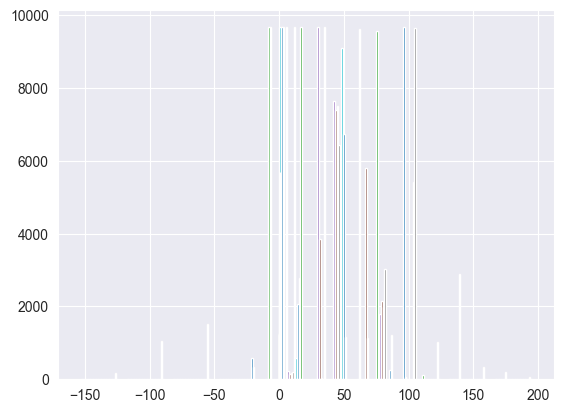

In [13]:
from sklearn.preprocessing import QuantileTransformer
from matplotlib import pyplot

quantile_train_df = train_df.copy()

pyplot.hist(quantile_train_df, bins=10)

qt = QuantileTransformer(n_quantiles=10, random_state=0)
data_trans = qt.fit_transform(quantile_train_df)

pyplot.hist(data_trans, bins=10)

## 2.2 A

### Корреляционный анализ (линейная связь)

In [26]:
corr = train_df.corr(numeric_only=False) 
# corr['oximetry'].sort_values()
corr_sorted = corr[['oximetry']].reindex(
    corr['oximetry'].abs().sort_values(ascending=False).index
)
corr_sorted

,oximetry
oximetry,1.000000
PVI,0.666423
Skin Temperature,0.362267
EtCO₂,0.276967
SpO₂,-0.131302
PI,-0.091824
Motion/Activity index,0.031496
HR,0.015588
PRV,-0.013805
SNR,0.013390


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.draw()
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


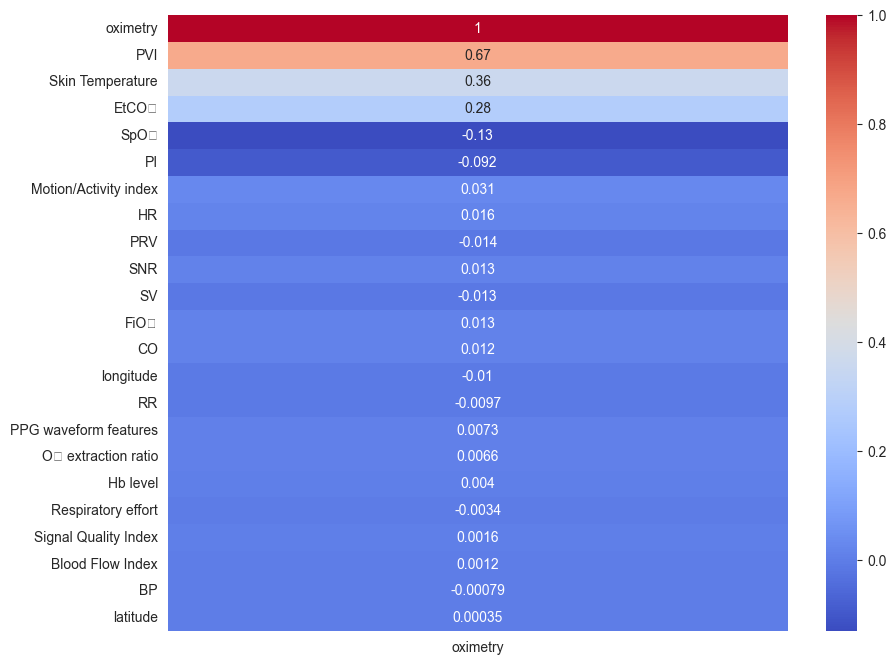

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_sorted, annot=True, cmap='coolwarm')
plt.show()

### ANOVA F-test (feature selection test)

In [58]:
from sklearn.feature_selection import SelectKBest, f_regression

X = train_df.drop(columns=['oximetry'])
y = train_df['oximetry']

selector = SelectKBest(score_func=f_regression, k=2)
X_new = selector.fit_transform(X, y)

print("Shape после отбора:", X_new.shape)

idx = selector.get_support(indices=True)
print("Выбранные признаки:", list(X.columns[idx]))

print("F-значения выбранных признаков:",
      selector.scores_[idx])

Shape после отбора: (9664, 22)
Выбранные признаки: ['SpO₂', 'HR', 'PI', 'RR', 'EtCO₂', 'FiO₂', 'PRV', 'BP', 'Skin Temperature', 'Motion/Activity index', 'PVI', 'Hb level', 'SV', 'CO', 'Blood Flow Index', 'PPG waveform features', 'Signal Quality Index', 'Respiratory effort', 'O₂ extraction ratio', 'SNR', 'latitude', 'longitude']
F-значения выбранных признаков: [1.69498140e+02 2.34827407e+00 8.21592324e+01 9.14090571e-01
 8.02760107e+02 1.54937343e+00 1.84161867e+00 6.08594691e-03
 1.45956938e+03 9.59413373e+00 7.71944963e+03 1.58195535e-01
 1.55546524e+00 1.33969227e+00 1.46444302e-02 5.12742857e-01
 2.51665211e-02 1.10988867e-01 4.23104893e-01 1.73251342e+00
 1.17122555e-03 9.80094517e-01]


In [20]:
from sklearn.feature_selection import f_regression

X = train_df.drop(columns=['oximetry'])
y = train_df['oximetry']

f_values, p_values = f_regression(X, y)

anova_results = pd.DataFrame({
    'Feature': X.columns,
    'F_value': f_values,
    'p_value': p_values
}).sort_values(by='F_value', ascending=False)

anova_results

,Feature,F_value,p_value
10,PVI,7719.449628,0.000000e+00
8,Skin Temperature,1459.569381,1.515637e-297
4,EtCO₂,802.760107,1.030688e-169
0,SpO₂,169.498140,2.002892e-38
2,PI,82.159232,1.499964e-19
9,Motion/Activity index,9.594134,1.957596e-03
1,HR,2.348274,1.254545e-01
6,PRV,1.841619,1.747930e-01
19,SNR,1.732513,1.881215e-01
12,SV,1.555465,2.123607e-01


In [61]:
from sklearn.feature_selection import SelectKBest, f_regression

X = train_df.drop(columns=['oximetry'])
y = train_df['oximetry']

selector = SelectKBest(score_func=f_regression, k='all')
X_new = selector.fit_transform(X, y)

idx = selector.get_support(indices=True)
selected_features = X.columns[idx]

anova_results = pd.DataFrame({
    'Feature': selected_features,
    'F_value': selector.scores_[idx],
    'p_value': selector.pvalues_[idx]
}).sort_values(by='F_value', ascending=False)

print("Shape после отбора:", X_new.shape)
print("Выбранные признаки:", list(selected_features))
print(anova_results)

Shape после отбора: (9664, 22)
Выбранные признаки: ['SpO₂', 'HR', 'PI', 'RR', 'EtCO₂', 'FiO₂', 'PRV', 'BP', 'Skin Temperature', 'Motion/Activity index', 'PVI', 'Hb level', 'SV', 'CO', 'Blood Flow Index', 'PPG waveform features', 'Signal Quality Index', 'Respiratory effort', 'O₂ extraction ratio', 'SNR', 'latitude', 'longitude']
                  Feature      F_value        p_value
10                    PVI  7719.449628   0.000000e+00
8        Skin Temperature  1459.569381  1.515637e-297
4                   EtCO₂   802.760107  1.030688e-169
0                    SpO₂   169.498140   2.002892e-38
2                      PI    82.159232   1.499964e-19
9   Motion/Activity index     9.594134   1.957596e-03
1                      HR     2.348274   1.254545e-01
6                     PRV     1.841619   1.747930e-01
19                    SNR     1.732513   1.881215e-01
12                     SV     1.555465   2.123607e-01
5                    FiO₂     1.549373   2.132582e-01
13                    

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


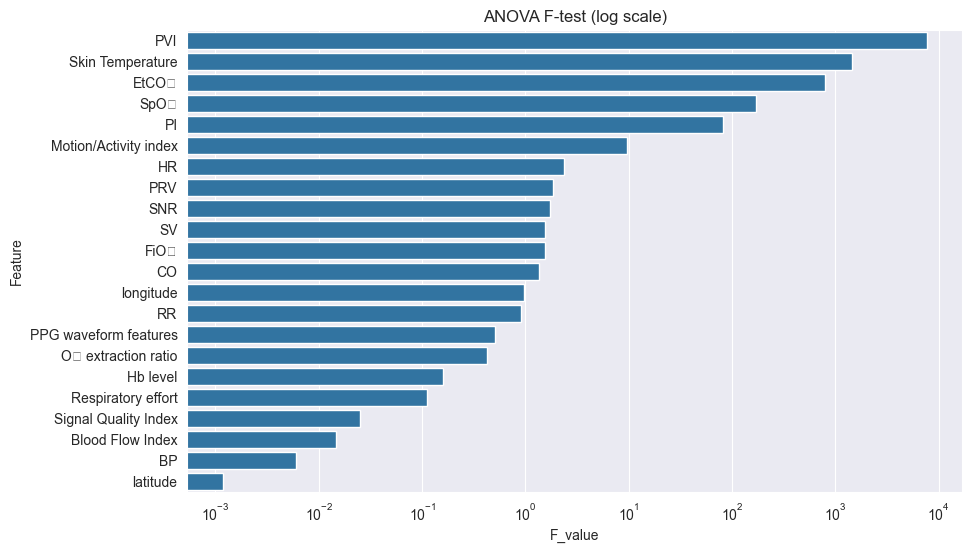

In [62]:
plt.figure(figsize=(10,6))
sns.barplot(data=anova_results, x='F_value', y='Feature')
plt.xscale('log')
plt.title('ANOVA F-test (log scale)')
plt.show()

### Mutual Information (нелинейная зависимость)

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


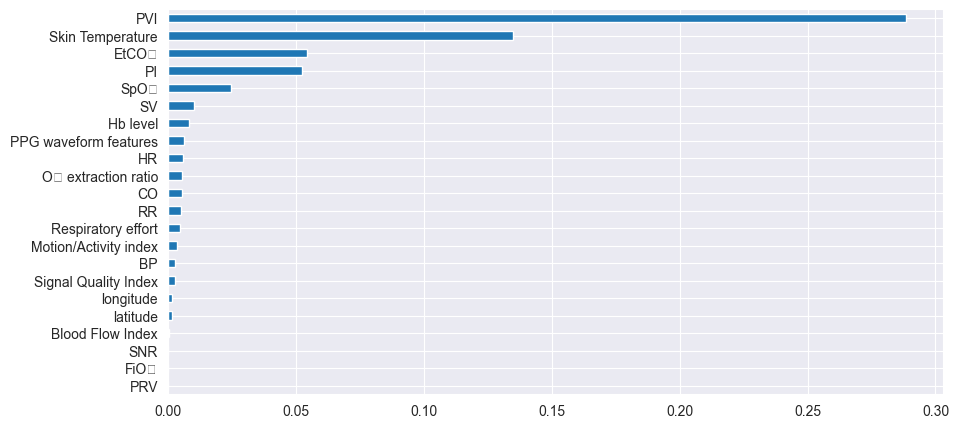

PVI                      0.288410
Skin Temperature         0.134976
EtCO₂                    0.054259
PI                       0.052630
SpO₂                     0.024786
SV                       0.010303
Hb level                 0.008258
PPG waveform features    0.006433
HR                       0.005980
O₂ extraction ratio      0.005747
CO                       0.005736
RR                       0.005239
Respiratory effort       0.004990
Motion/Activity index    0.003794
BP                       0.002892
Signal Quality Index     0.002725
longitude                0.001801
latitude                 0.001691
Blood Flow Index         0.000317
SNR                      0.000000
PRV                      0.000000
FiO₂                     0.000000
dtype: float64


In [54]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
import pandas as pd
import matplotlib.pyplot as plt

selector = SelectKBest(score_func=mutual_info_regression, k=4)
selector.fit(X, y)

scores = pd.Series(abs(selector.scores_), index=X.columns).sort_values()

plt.figure(figsize=(10,5))
scores.plot(kind='barh')
plt.show()

print(scores.sort_values(ascending=False))

In [100]:
corr_part = corr_sorted['oximetry'].abs().rename('Pearson_|r|')
anova_part = anova_results.set_index('Feature')['F_value'].rename('ANOVA_F')
mi_part = scores.rename('Mutual_Info')

compare_simple = pd.concat([corr_part, anova_part, mi_part], axis=1)
compare_simple = compare_simple.drop(index='oximetry', errors='ignore')
display(compare_simple)

# === 1️⃣ Нормализация в диапазоне [0,1] для каждой метрики ===
norm = compare_simple.apply(lambda s: (s - s.min()) / (s.max() - s.min()), axis=0)

# === 2️⃣ Добавляем среднее значение для финального сравнения ===
norm['Mean_Score'] = norm.mean(axis=1)

# === 3️⃣ Сортируем по информативности ===
final_display = norm.sort_values('Mean_Score', ascending=False)

final_display.style.format('{:.6f}')

,Pearson_|r|,ANOVA_F,Mutual_Info
PVI,0.666423,7719.449628,0.288410
Skin Temperature,0.362267,1459.569381,0.134976
EtCO₂,0.276967,802.760107,0.054259
SpO₂,0.131302,169.498140,0.024786
PI,0.091824,82.159232,0.052630
Motion/Activity index,0.031496,9.594134,0.003794
HR,0.015588,2.348274,0.005980
PRV,0.013805,1.841619,0.000000
SNR,0.013390,1.732513,0.000000
SV,0.012687,1.555465,0.010303


,Pearson_|r|,ANOVA_F,Mutual_Info,Mean_Score
PVI,1.000000,1.000000,1.000000,1.000000
Skin Temperature,0.543361,0.189077,0.468002,0.400147
EtCO₂,0.415297,0.103992,0.188130,0.235806
PI,0.137336,0.010643,0.182483,0.110154
SpO₂,0.196606,0.021957,0.085939,0.101501
Motion/Activity index,0.046763,0.001243,0.013156,0.020387
SV,0.018525,0.000201,0.035723,0.018150
HR,0.022880,0.000304,0.020734,0.014639
CO,0.017155,0.000173,0.019889,0.012406
Hb level,0.005552,0.000020,0.028633,0.011402


## 2.2 B

,Pearson_|r|,ANOVA_F,Mutual_Info,Mean_Score
PVI,1.000000,1.000000,1.000000,1.000000
Skin Temperature,0.543361,0.189077,0.468002,0.400147
EtCO₂,0.415297,0.103992,0.188130,0.235806
PI,0.137336,0.010643,0.182483,0.110154
SpO₂,0.196606,0.021957,0.085939,0.101501
Motion/Activity index,0.046763,0.001243,0.013156,0.020387
SV,0.018525,0.000201,0.035723,0.018150
HR,0.022880,0.000304,0.020734,0.014639
CO,0.017155,0.000173,0.019889,0.012406
Hb level,0.005552,0.000020,0.028633,0.011402


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


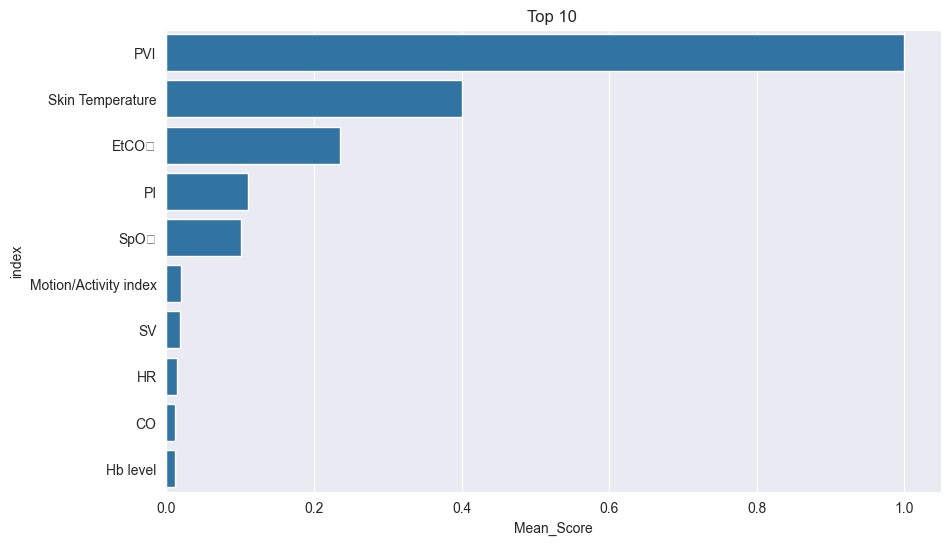

In [105]:
ranked_features = final_display.sort_values('Mean_Score', ascending=False)

display(ranked_features.style.format('{:.6f}'))

plt.figure(figsize=(10,6))
sns.barplot(data=ranked_features.head(10).reset_index(), x='Mean_Score', y='index')
plt.title('Top 10 ')
plt.show()

## 2.2 C
### (C-1b) Zdôvodnenie rozhodnutí pri realizácii

Pri realizácii úlohy som sa rozhodol využiť tri komplementárne prístupy na hodnotenie informatívnosti atribútov:
**Pearsonova korelácia**, **ANOVA F-test** a **Mutual Information**.  
Tieto techniky reprezentujú tri rôzne pohľady na vzťah medzi vstupnými premennými a cieľovou premennou *oximetry*:

- **Pearsonova korelácia** umožňuje zachytiť **lineárnu závislosť** medzi atribútom a cieľovou premennou.
- **ANOVA F-test** zisťuje, či existujú **štatisticky významné rozdiely v priemeroch** medzi skupinami hodnôt a hodnotí lineárnu relevantnosť premenných.
- **Mutual Information** je **nelineárna metóda**, ktorá kvantifikuje množstvo informácie, ktorú jeden atribút poskytuje o inom, a teda odhaľuje aj zložitejšie vzťahy.

Výber týchto troch metód umožnil porovnať lineárne aj nelineárne súvislosti a získať
robustnejší prehľad o dôležitosti atribútov.

Všetky výsledky boli následne **normalizované pomocou min–max transformácie** do intervalu ⟨0, 1⟩,  
aby bolo možné spravodlivo porovnávať hodnoty z rôznych metód, ktoré majú odlišné jednotky a rozsahy.
Z týchto normalizovaných hodnôt bol vypočítaný **priemerný index informatívnosti (Mean Score)**,
ktorý vyjadruje celkovú dôležitosť atribútu naprieč metódami.

Týmto postupom bolo zabezpečené:
- porovnateľnosť výsledkov z rôznych štatistických metód,
- odstránenie vplyvu rozdielnych mierok hodnôt (napr. F-hodnoty vs. korelácia),
- transparentný a reprodukovateľný spôsob zoradenia atribútov podľa dôležitosti.

Takto spracované výsledky umožňujú jednoznačne určiť,
ktoré atribúty majú najväčší vplyv na predikciu *oximetry*
a sú vhodné pre ďalšiu tvorbu predikčných modelov.
